In [85]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [86]:
df = pd.read_csv('amaz_stock_data.csv')

In [87]:
# data preparation

In [88]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Brand_Name',
       'Ticker', 'Industry_Tag', 'Country', 'Dividends', 'Stock Splits',
       'Capital Gains'],
      dtype='object')

In [89]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [90]:
df.head()

,date,open,high,low,close,volume,brand_name,ticker,industry_tag,country,dividends,stock_splits,capital_gains
0,2025-07-03 00:00:00-04:00,221.705002,224.009995,221.360001,223.410004,29295154,amazon,AMZN,e-commerce,usa,0,0,NaN
1,2025-07-03 00:00:00-04:00,221.820007,224.009995,221.360001,223.410004,29632400,amazon,AMZN,e-commerce,usa,0,0,NaN
2,2025-07-02 00:00:00-04:00,219.729996,221.600006,219.059998,219.919998,30840800,amazon,AMZN,e-commerce,usa,0,0,NaN
3,2025-07-01 00:00:00-04:00,219.500000,221.880005,217.929993,220.460007,39200000,amazon,AMZN,e-commerce,usa,0,0,NaN
4,2025-06-30 00:00:00-04:00,223.520004,223.820007,219.119995,219.389999,58798200,amazon,AMZN,e-commerce,usa,0,0,NaN


In [91]:
df.dtypes

date              object
open             float64
high             float64
low              float64
close            float64
volume             int64
brand_name        object
ticker            object
industry_tag      object
country           object
dividends          int64
stock_splits       int64
capital_gains    float64
dtype: object

In [92]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['date', 'brand_name', 'ticker', 'industry_tag', 'country']

In [93]:
for col in strings:
       df[col] = df[col].str.lower().str.replace(' ','_')

In [94]:
df

,date,open,high,low,close,volume,brand_name,ticker,industry_tag,country,dividends,stock_splits,capital_gains
0,2025-07-03_00:00:00-04:00,221.705002,224.009995,221.360001,223.410004,29295154,amazon,amzn,e-commerce,usa,0,0,NaN
1,2025-07-03_00:00:00-04:00,221.820007,224.009995,221.360001,223.410004,29632400,amazon,amzn,e-commerce,usa,0,0,NaN
2,2025-07-02_00:00:00-04:00,219.729996,221.600006,219.059998,219.919998,30840800,amazon,amzn,e-commerce,usa,0,0,NaN
3,2025-07-01_00:00:00-04:00,219.500000,221.880005,217.929993,220.460007,39200000,amazon,amzn,e-commerce,usa,0,0,NaN
4,2025-06-30_00:00:00-04:00,223.520004,223.820007,219.119995,219.389999,58798200,amazon,amzn,e-commerce,usa,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2021-10-05_00:00:00-04:00,160.225006,163.036499,160.123001,161.050003,65384000,amazon,amzn,e-commerce,usa,0,0,NaN
996,2021-10-04_00:00:00-04:00,163.969498,163.999496,158.812500,159.488998,90462000,amazon,amzn,e-commerce,usa,0,0,NaN
997,2021-10-01_00:00:00-04:00,164.450501,165.458496,162.796997,164.162994,56712000,amazon,amzn,e-commerce,usa,0,0,NaN
998,2021-09-30_00:00:00-04:00,165.800003,166.392502,163.699493,164.251999,56848000,amazon,amzn,e-commerce,usa,0,0,NaN


In [95]:
print(df.columns)


Index(['date', 'open', 'high', 'low', 'close', 'volume', 'brand_name',
       'ticker', 'industry_tag', 'country', 'dividends', 'stock_splits',
       'capital_gains'],
      dtype='object')


In [96]:
df['date'] = df['date'].str.replace('_', ' ', regex=False)
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)




In [97]:
df.head()

,date,open,high,low,close,volume,brand_name,ticker,industry_tag,country,dividends,stock_splits,capital_gains
0,2025-07-03 04:00:00+00:00,221.705002,224.009995,221.360001,223.410004,29295154,amazon,amzn,e-commerce,usa,0,0,NaN
1,2025-07-03 04:00:00+00:00,221.820007,224.009995,221.360001,223.410004,29632400,amazon,amzn,e-commerce,usa,0,0,NaN
2,2025-07-02 04:00:00+00:00,219.729996,221.600006,219.059998,219.919998,30840800,amazon,amzn,e-commerce,usa,0,0,NaN
3,2025-07-01 04:00:00+00:00,219.500000,221.880005,217.929993,220.460007,39200000,amazon,amzn,e-commerce,usa,0,0,NaN
4,2025-06-30 04:00:00+00:00,223.520004,223.820007,219.119995,219.389999,58798200,amazon,amzn,e-commerce,usa,0,0,NaN


In [98]:
print("Shape of dataset:", df.shape)
print("\nMissing values per column:")
print(df.isna().sum())

print("\nSummary statistics:")
print(df.describe())

Shape of dataset: (1000, 13)

Missing values per column:
date                0
open                0
high                0
low                 0
close               0
volume              0
brand_name          0
ticker              0
industry_tag        0
country             0
dividends           0
stock_splits        0
capital_gains    1000
dtype: int64

Summary statistics:
              open         high          low        close        volume  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1.000000e+03   
mean    157.041936   159.003282   154.935264   157.025742  5.651587e+07   
std      39.648865    39.793008    39.379473    39.626914  2.761145e+07   
min      82.800003    83.480003    81.430000    81.820000  1.433375e+07   
25%     125.240000   127.332500   123.947502   125.712750  3.876210e+07   
50%     159.222496   161.761246   157.707252   160.254501  5.051394e+07   
75%     186.464996   187.960003   183.807495   186.357506  6.652998e+07   
max     239.020004   24

In [99]:
df.drop(columns=['capital_gains'], inplace=True)


In [100]:
print(df.isna().sum())

date            0
open            0
high            0
low             0
close           0
volume          0
brand_name      0
ticker          0
industry_tag    0
country         0
dividends       0
stock_splits    0
dtype: int64


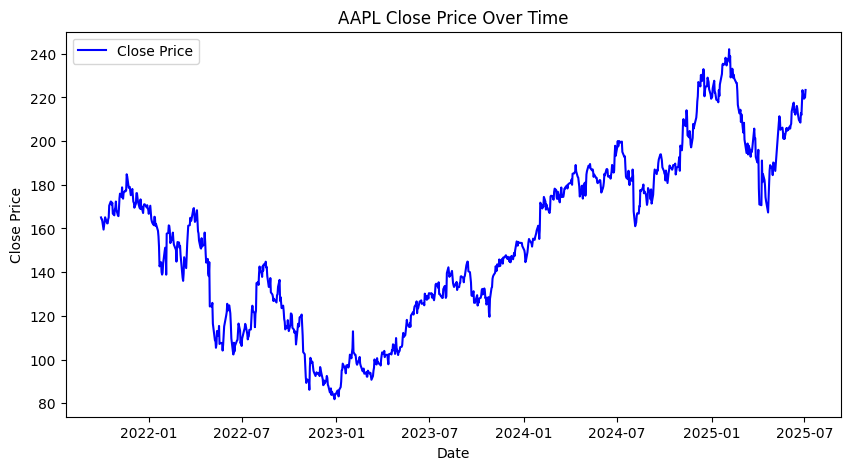

In [102]:
# Plot Close price over time
plt.figure(figsize=(10,5))
plt.plot(df['date'], df['close'], label='Close Price', color='blue')
plt.title("AAPL Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

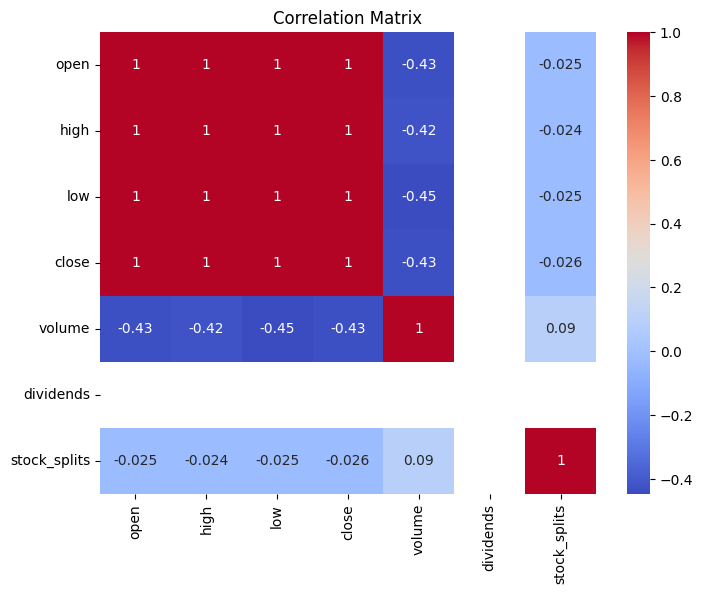

In [103]:
# Correlation heatmap for numeric columns
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()